In [1]:
!pip install nltk tensorflow livelossplot scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('punkt', download_dir='.')
nltk.download('stopwords', download_dir='.')
nltk.download('stopwords')
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
import keras

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import tensorflow as tf

In [4]:
from livelossplot.tf_keras import PlotLossesCallback

**<h2>1. Data Preprocessing </h2>**

**<h4>1.1 Loading Data</h4>**

In [5]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.shape

(74681, 4)

**<h4>1.2 Removing Gaps</h4>**

In [7]:
df.drop(df[df.iloc[:, -1].isnull()].index, inplace=True)

In [8]:
df.shape

(73995, 4)

**<h4>1.3 Tokenize text</h4>**

**<h5>1.3.1 Create a function for Stopwords and Punctuations</h5>**

In [9]:
def tokenize_text(text):
    tokenized_string = nltk.word_tokenize(text)
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [i.lower() for i in tokenized_string if i not in string.punctuation]
    tokens = [i.lower() for i in tokens if i not in stop_words]
    return tokens

In [10]:
tokensed_tweets = df.iloc[:, -1].apply(tokenize_text)
tokensed_tweets[:5]

0                  [coming, borders, kill]
1         [im, getting, borderlands, kill]
2        [im, coming, borderlands, murder]
3    [im, getting, borderlands, 2, murder]
4       [im, getting, borderlands, murder]
Name: im getting on borderlands and i will murder you all ,, dtype: object

In [11]:
df['tokensed_tweets'] = tokensed_tweets

In [12]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"


**<h5>1.3.2 Vectorize Text</h5>**

In [13]:
!pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from gensim.models import Word2Vec
w2v = Word2Vec(df['tokensed_tweets'], vector_size=256, window=10, min_count=10, workers=4, sg=1)

**<h5>1.3.2.1 Let's look at vector for the word 'android'</h5>**

In [15]:
w2v.wv.get_vector('android')

array([ 0.3608644 , -0.306029  , -0.01954144,  0.0152333 ,  0.10012552,
        0.39814124, -0.05092034, -0.25978547, -0.00392098,  0.04846304,
       -0.25644204,  0.05728363,  0.04554237, -0.40631154, -0.220381  ,
        0.60656816, -0.20990098,  0.057057  , -0.05031004,  0.65821785,
        0.00461497, -0.01310502, -0.22872756, -0.40701324, -0.1591111 ,
        0.2552863 ,  0.14393651,  0.1681494 , -0.01561705,  0.18083933,
        0.31931463,  0.18265572,  0.18244116, -0.69071513, -0.3374406 ,
        0.12834273,  0.05878092, -0.2502038 , -0.02604861,  0.14901653,
        0.10964089, -0.0161303 , -0.23987646,  0.02040904, -0.06109064,
       -0.1683101 , -0.0337422 , -0.33289334,  0.24150465, -0.10041108,
        0.1656503 , -0.2013687 ,  0.03171809, -0.15571621,  0.25847968,
       -0.01561768, -0.16502208,  0.06257934,  0.15644555, -0.03119417,
       -0.09540324,  0.21551949,  0.01969908,  0.09156301,  0.10574993,
        0.18335761, -0.22995763,  0.04480803,  0.03452076, -0.38

**<h5>1.3.2.2 Let's look at the words that are close to word 'android'</h5>**

In [16]:
w2v.wv.most_similar('android')

[('ios', 0.7493204474449158),
 ('battery', 0.653163492679596),
 ('api', 0.6318997740745544),
 ('itt', 0.6278545260429382),
 ('ipad', 0.6248323917388916),
 ('processor', 0.6167888641357422),
 ('unusable', 0.6118691563606262),
 ('lite', 0.6087886691093445),
 ('keyboard', 0.5965186357498169),
 ('cookies', 0.5865893959999084)]

**<hs>1.3.2.3 Finding number of elements</h5>**

In [17]:
word_vocab = w2v.wv.key_to_index
len(word_vocab.keys())

7884

**<h4>1.4 Text representation of categories in numbers</h4>**

In [18]:
df.Positive.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Positive'] = encoder.fit_transform(df['Positive'])
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"


In [20]:
df.Positive.unique()

array([3, 2, 1, 0])

**<h4>1.5 Decoder and Encoder</h4>**

In [21]:
word_vocab = {k:(v+3) for k,v in word_vocab.items()}
word_vocab["<PAD>"] = 0
word_vocab["<START>"] = 1
word_vocab["<UNKNOWN>"] = 2

reverse_word_vocab = dict([(value, key) for (key, value) in word_vocab.items()])

# index sequence to text
def decode_review(text):
    return ' '.join([reverse_word_vocab.get(i, '?') for i in text])

# text to index sequence
def encode_review(text):
    text = ['<START>'] + text
    indexes = np.array([word_vocab.get(word, word_vocab['<UNKNOWN>']) for word in text])
    return indexes

In [22]:
df['vect'] = df.tokensed_tweets.apply(encode_review)
print(df.tokensed_tweets[1])
print(df.vect[1])
print('Example of a decoded review: \n{}'.format(decode_review(df.vect[1])))

['im', 'getting', 'borderlands', 'kill']
[  1 206  94  69 320]
Example of a decoded review: 
<START> im getting borderlands kill


**<h5>1.6 Split data into test and validation sets</h5>**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.vect, df.Positive, test_size=0.2, random_state=40)

In [24]:
X_train[:5]

9952     [1, 217, 187, 55, 267, 1957, 4823, 1069, 63, 3...
5667     [1, 110, 298, 551, 945, 42, 247, 429, 722, 309...
38790                               [1, 39, 2, 1154, 1233]
32604    [1, 34, 380, 95, 197, 86, 345, 1564, 146, 4, 4...
29729    [1, 214, 2, 1665, 56, 103, 978, 2062, 3, 93, 6...
Name: vect, dtype: object

In [25]:
y_train[:5]

9952     2
5667     2
38790    1
32604    2
29729    1
Name: Positive, dtype: int32

**<h4>1.7 Encoding Y</h4>**

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_sparse = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_sparse = ohe.transform(np.array(y_test).reshape(-1, 1))

# Convert sparse matrices to dense arrays
y_train = y_train_sparse.toarray()
y_test = y_test_sparse.toarray()

In [27]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

**<h4>1.8 Convert data to the same length</h4>**

In [28]:
from random import randint

MAX_SEQ_LEN = 128 # Final sequence length

train_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_train,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

valid_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_test,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

print("Length examples: {}".format([len(train_data[randint(0, 99)]), len(train_data[0])]))
print('=====================================')
print("Entry example: {}".format(train_data[randint(0, 99)]))

Length examples: [128, 128]
Entry example: [   1  217  187   55  267 1957 4823 1069   63   38   90  100  983 1005
  731 3383 7559    2 1397    2    2    3    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


**<h4>2. Create Model</h4>**

In [29]:
BATCH_SIZE = 256

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(26960, 64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model_lstm.summary()

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[tf.keras.metrics.AUC()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1725440   
                                                                 
 bidirectional (Bidirection  (None, None, 64)          24832     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, None, 64)          256       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, None, 64)          256       
 chNormalization)                                      

**<h4>3. Model Training</h4>**

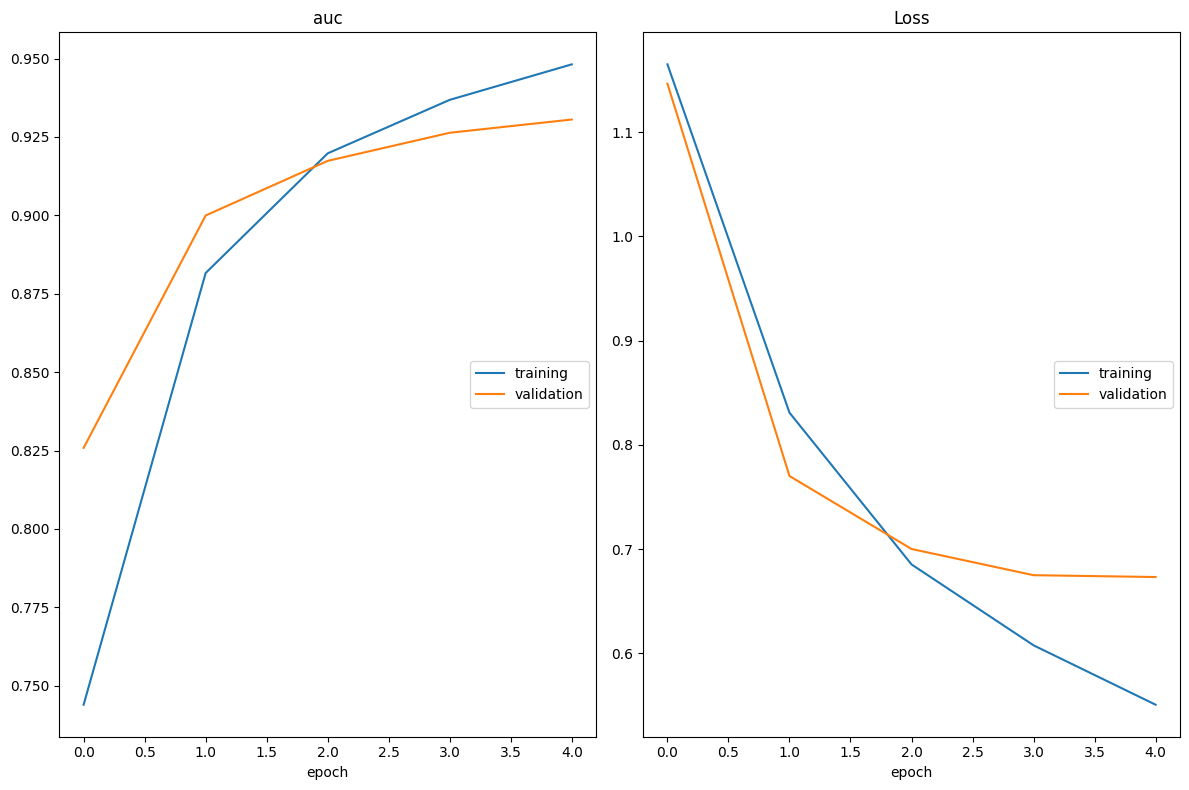

auc
	training         	 (min:    0.744, max:    0.948, cur:    0.948)
	validation       	 (min:    0.826, max:    0.931, cur:    0.931)
Loss
	training         	 (min:    0.551, max:    1.165, cur:    0.551)
	validation       	 (min:    0.673, max:    1.146, cur:    0.673)
232/232 [==============================] - 2742s 12s/step - loss: 0.5507 - auc: 0.9482 - val_loss: 0.6732 - val_auc: 0.9306


In [30]:
EPOCHS = 5
history = model_lstm.fit(
    train_data, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(valid_data, y_test),
    epochs=EPOCHS,
    callbacks=[PlotLossesCallback()]
)

**<h4>4. Predict and test model</h4>**

In [31]:
model_lstm.predict(valid_data[0, None])

1/1 [==============================] - 3s 3s/step


array([[0.0026732 , 0.8461878 , 0.13975438, 0.01138464]], dtype=float32)

In [32]:
results = model_lstm.evaluate(valid_data, y_test)

print('Test loss: {:.4f}'.format(results[0]))
print('Test accuracy: {:.2f} %'.format(results[1]*100))

463/463 [==============================] - 33s 72ms/step - loss: 0.6732 - auc: 0.9306
Test loss: 0.6732
Test accuracy: 93.06 %
